# Predictive Maintenance with Time-Series Forecasting
In this project, we aim to use time-series forecasting models such as ARIMA and SARIMA to predict sensor values from a hydraulic system and detect anomalies that may indicate maintenance needs.


Reading file: C:\Users\Alexis\Documents\predictive-maintenance-of-hydraulic-systems\Data\CE.txt
    col_0   col_1   col_2   col_3   col_4   col_5   col_6   col_7   col_8  \
0  47.202  47.273  47.250  47.332  47.213  47.372  47.273  47.438  46.691   
1  29.208  28.822  28.805  28.922  28.591  28.643  28.216  27.812  27.514   
2  23.554  23.521  23.527  23.008  23.042  23.052  22.658  22.952  22.908   
3  21.540  21.419  21.565  20.857  21.052  21.039  20.926  20.912  20.989   
4  20.460  20.298  20.350  19.867  19.997  19.972  19.924  19.813  19.691   

    col_9  ...  col_50  col_51  col_52  col_53  col_54  col_55  col_56  \
0  46.599  ...  31.554  30.953  30.639  30.561  30.368  30.224  29.790   
1  27.481  ...  23.995  24.328  24.283  23.877  23.816  23.933  23.354   
2  22.359  ...  21.711  21.564  21.564  21.526  21.753  21.749  21.802   
3  20.882  ...  20.687  20.703  20.295  20.482  20.600  20.547  20.708   
4  19.634  ...  19.887  19.919  19.696  19.634  19.747  20.005  19.919 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



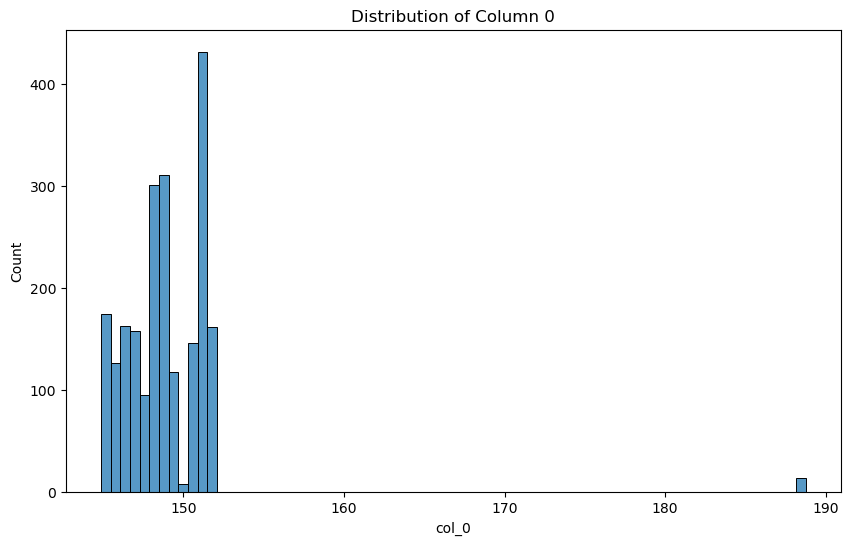

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'Cooler_Condition', 'Valve_Condition',
       'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag'],
      dtype='object')
(2205, 65)
    col_0   col_1   col_2   col_3   col_4   col_5   col_6   col_7   col_8  \
0  151.12  151.09  151.16  151.22  151.16  151.11  151.19  151.24  151.16   
1  150.84  150.92  150.82  150.77  150.86  150.80  150.82 

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define directory path
data_dir = r"C:\Users\Alexis\Documents\predictive-maintenance-of-hydraulic-systems\Data"

# Initialize sensor dictionary
sensor_data = {}

# Read each file and combine them
for filename in os.listdir(data_dir):
    if filename.endswith('.txt') and 'description' not in filename.lower() and 'documentation' not in filename.lower():
        sensor_type = filename.split('.')[0]
        filepath = os.path.join(data_dir, filename)
        
        print(f"Reading file: {filepath}")  # Print file being processed
        
        # Load the data, assuming no header and providing default column names
        df = pd.read_csv(filepath, delimiter='\t', header=None, 
                         names=[f"col_{i}" for i in range(60)], encoding="ISO-8859-1")  # Example assumes 60 columns

        print(df.head())  # Print the first few rows of the dataframe
        
        if sensor_type not in sensor_data:
            sensor_data[sensor_type] = df
        else:
            sensor_data[sensor_type] = pd.concat([sensor_data[sensor_type], df])

# Now load the failure condition data
profile_path = os.path.join(data_dir, 'profile.txt')
profile_data = pd.read_csv(profile_path, delimiter='\t', header=None)

# Add column names for the failure conditions
profile_data.columns = ['Cooler_Condition', 'Valve_Condition', 'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag']

# Example: use PS1 as the sensor data (could extend to other sensors)
pressure_data = sensor_data.get('PS1')

# Example of preprocessing
def preprocess_data(df):
    df.dropna(inplace=True)  # Remove missing values
    return df

# Apply preprocessing to the pressure data
if pressure_data is not None:
    pressure_data = preprocess_data(pressure_data)

    # Combine with failure condition data (assuming both have the same length/indices)
    if len(pressure_data) == len(profile_data):
        pressure_data = pressure_data.reset_index(drop=True)  # Reset index to ensure proper merge
        pressure_data = pd.concat([pressure_data, profile_data], axis=1)
    else:
        print("Mismatch in length between sensor data and profile data")

    # Check the combined data
    print(pressure_data.head())

    # Visualize one column (col_0) from sensor data
    plt.figure(figsize=(10, 6))
    sns.histplot(pressure_data['col_0'])  # Replace 'col_0' with an actual column name
    plt.title('Distribution of Column 0')
    plt.show()

    # Print sensor data and failure conditions
    print(pressure_data.columns)
    print(pressure_data.shape)
    print(pressure_data.head())
else:
    print("No data found for PS1 sensor")



## Data Description
The dataset contains multiple sensor readings from a hydraulic system. Each sensor column represents time-series data for a specific sensor, such as pressure sensors, temperature sensors, and more. The goal is to forecast future sensor values and identify anomalies that indicate potential system failures.

In [5]:
# Print the columns of PS1 data to understand the structure
df = sensor_data['PS1']
print(df.columns)

# Define new column names based on sensor type
# Example: PS1 is pressure sensor, TS1 is temperature sensor, etc.
sensor_column_mapping = {
    'PS1': [f'PS1_Col_{i}' for i in range(60)],
    'PS2': [f'PS2_Col_{i}' for i in range(60)],
    'PS3': [f'PS3_Col_{i}' for i in range(60)],
    'PS4': [f'PS4_Col_{i}' for i in range(60)],
    'PS5': [f'PS5_Col_{i}' for i in range(60)],
    'PS6': [f'PS6_Col_{i}' for i in range(60)],
    'TS1': [f'TS1_Col_{i}' for i in range(60)],  # Assuming TS data has similar column count
    'TS2': [f'TS2_Col_{i}' for i in range(60)],
    'TS3': [f'TS3_Col_{i}' for i in range(60)],
    'TS4': [f'TS4_Col_{i}' for i in range(60)],
    'EPS1': [f'EPS1_Col_{i}' for i in range(60)],
    'FS1': [f'FS1_Col_{i}' for i in range(60)],
    'FS2': [f'FS2_Col_{i}' for i in range(60)],
    'VS1': [f'VS1_Col_{i}' for i in range(60)]
}

# Rename columns based on sensor type
for sensor, columns in sensor_column_mapping.items():
    if sensor in sensor_data:
        sensor_data[sensor].columns = columns

# Example: Print updated column names for PS1
print(sensor_data['PS1'].columns)


# Load the profile.txt file which should contain the failure conditions
profile_filepath = os.path.join(data_dir, 'profile.txt')

# Assuming the profile.txt is tab-delimited and has no header
profile_df = pd.read_csv(profile_filepath, delimiter='\t', header=None, 
                         names=['Cooler', 'Valve', 'Pump_Leakage', 'Accumulator', 'Stable_Flag'])

print(profile_df.head())  # Print first few rows to check if it loaded correctly

# Reset the index of both dataframes to align them properly
sensor_data['PS1'].reset_index(drop=True, inplace=True)
profile_df.reset_index(drop=True, inplace=True)

# Now merge the profile data with the PS1 sensor data
df_merged = pd.concat([sensor_data['PS1'], profile_df], axis=1)

# Print the merged dataframe to check if the data aligns properly
print(df_merged.head())



Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59'],
      dtype='object')
Index(['PS1_Col_0', 'PS1_Col_1', 'PS1_Col_2', 'PS1_Col_3', 'PS1_Col_4',
       'PS1_Col_5', 'PS1_Col_6', 'PS1_Col_7', 'PS1_Col_8', 'PS1_Col_9',
       'PS1_Col_10', 'PS1_Col_11', 'PS1_Col_12', 'PS1_Col_13', 'PS1_Col_14',
       'PS1_Col_15', 'PS1_Col_16', 'PS1_Col_17', 'PS1_Col_18', 'PS1_Col_19',
       'PS1_Col_20', 'PS1_

Accuracy: 0.9909297052154195

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       154
           1       0.99      1.00      0.99       287

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



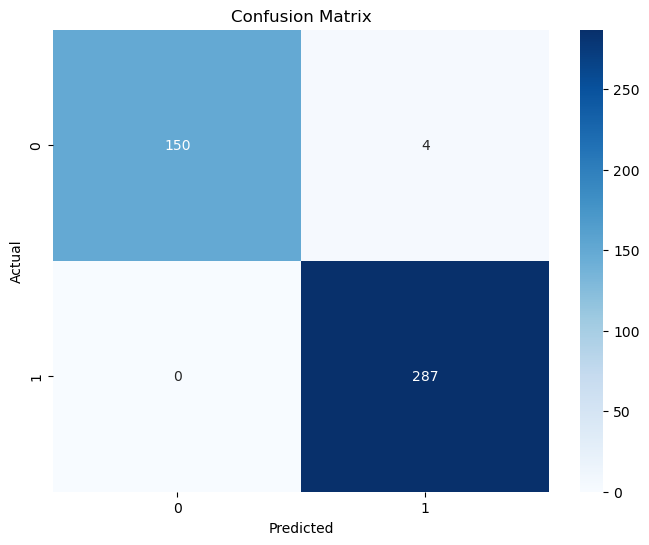

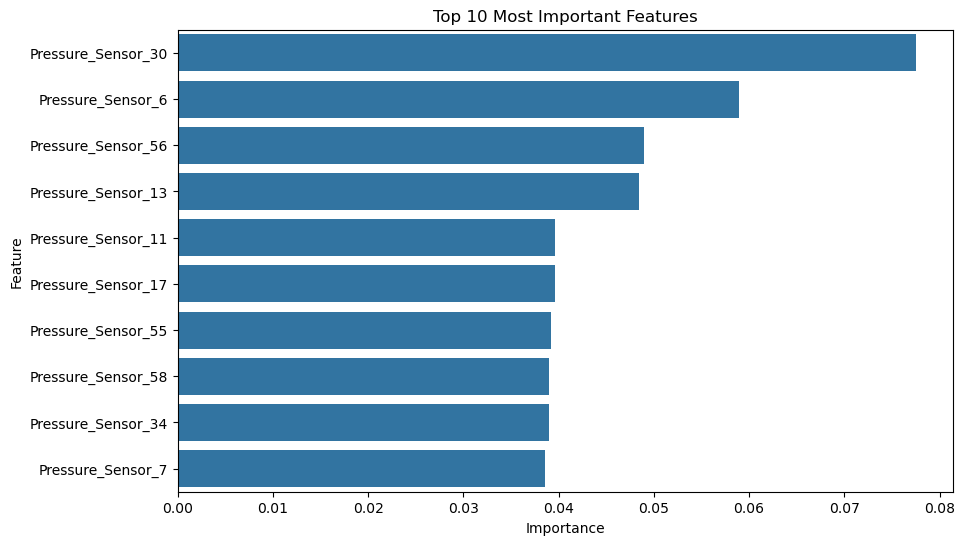

               feature  importance
29  Pressure_Sensor_30    0.077501
5    Pressure_Sensor_6    0.058990
55  Pressure_Sensor_56    0.049014
12  Pressure_Sensor_13    0.048414
10  Pressure_Sensor_11    0.039661
16  Pressure_Sensor_17    0.039588
54  Pressure_Sensor_55    0.039234
57  Pressure_Sensor_58    0.038999
33  Pressure_Sensor_34    0.038977
6    Pressure_Sensor_7    0.038608
35  Pressure_Sensor_36    0.030126
41  Pressure_Sensor_42    0.030054
32  Pressure_Sensor_33    0.029595
15  Pressure_Sensor_16    0.029321
19  Pressure_Sensor_20    0.029297
28  Pressure_Sensor_29    0.020541
18  Pressure_Sensor_19    0.020221
14  Pressure_Sensor_15    0.020131
46  Pressure_Sensor_47    0.020043
51  Pressure_Sensor_52    0.019951


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare features and target
X = pressure_data.drop(columns=['Cooler_Condition', 'Valve_Condition', 'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag'])
y = pressure_data['Cooler_Condition'].apply(lambda x: 1 if x < 100 else 0)  # 1 if cooler condition < 100%, 0 otherwise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features (helps some models perform better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rename the columns for X_train_scaled and X_test_scaled before training the model
sensor_columns = [f'Pressure_Sensor_{i+1}' for i in range(60)]
X_train.columns = sensor_columns  # Rename X_train with sensor names

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Confusion_Matrix')
plt.show()


# Extract feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,  # These will now be the renamed sensor columns
    'importance': rf_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Most_Important_Features')
plt.show()


# Check the full feature importance ranking
print(feature_importance.head(20))


## Data Preprocessing
We performed several data preparation steps including renaming columns, sorting the data, and handling missing values. This step ensures that our data is in the correct format for forecasting.

In [ ]:
# Analysis Notes

# Feature Importance:
# - The top 10 most important features used by the Random Forest Classifier to predict cooler failure were:
#   1. Pressure_Sensor_30
#   2. Pressure_Sensor_6
#   3. Pressure_Sensor_56
#   4. Pressure_Sensor_13
#   5. Pressure_Sensor_11
#   6. Pressure_Sensor_17
#   7. Pressure_Sensor_55
#   8. Pressure_Sensor_58
#   9. Pressure_Sensor_34
#   10. Pressure_Sensor_7
# - These sensors had the highest impact on predicting cooler failure, meaning they are critical in identifying potential problems.
# - This information can guide maintenance priorities and ensure these sensors are well-monitored.

# Confusion Matrix:
# - Out of 154 actual healthy units (class 0), the model correctly identified 150, with only 4 false positives (predicted failure, but actually healthy).
# - Out of 287 actual failure units (class 1), the model correctly identified all 287 with 0 false negatives (no missed failures).
# - Overall, the model did an excellent job, as false negatives (missed failures) are especially critical in maintenance settings.

# Classification Report:
# - Precision: 99% for class 1 (failures), meaning that out of all predicted failures, 99% were actual failures.
# - Recall: 100% for class 1, meaning that the model detected all actual failures with no misses.
# - F1-score: A balance of precision and recall for class 1 is 99%, which is excellent performance overall.
# - The model's accuracy was 99%, meaning it correctly classified the vast majority of test data.

# Conclusion:
# - The model has high accuracy, precision, and recall, especially for detecting failures (class 1).
# - The most important features for predicting cooler failure were primarily pressure sensors, which should be the focus in preventive maintenance strategies.
# - Future iterations of the project could explore collecting more data and refining the model with additional features or different algorithms to see if further improvements can be made.


Data shape for anomaly detection: (2205, 60)
Anomaly
 1    2094
-1     111
Name: count, dtype: int64


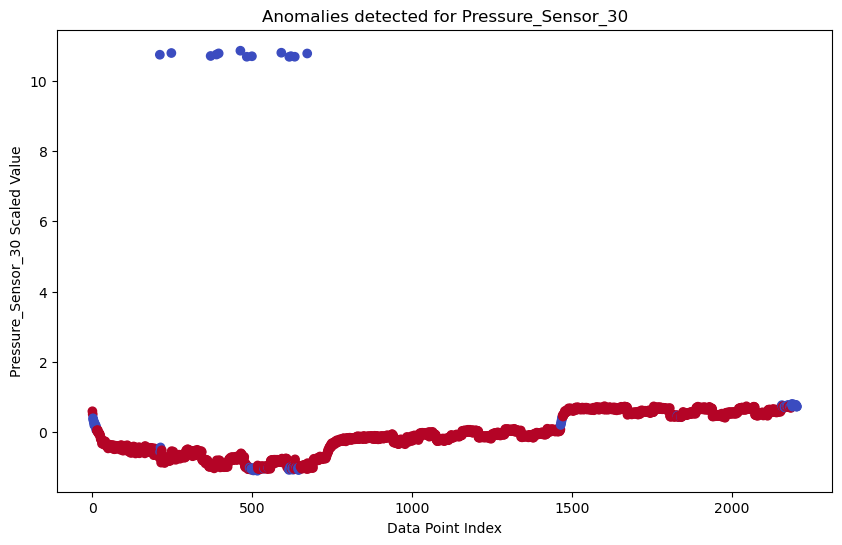

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop non-feature columns
X = pressure_data.drop(columns=['Cooler_Condition', 'Valve_Condition', 'Pump_Leakage', 'Accumulator_Pressure', 'Stable_Flag'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output the shape of the scaled data
print(f"Data shape for anomaly detection: {X_scaled.shape}")


from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # contamination is the proportion of anomalies we expect

# Fit the model to the scaled data
iso_forest.fit(X_scaled)

# Predict anomalies (-1 indicates an anomaly, 1 indicates normal data)
anomaly_pred = iso_forest.predict(X_scaled)

# Add predictions to the DataFrame for easy analysis
pressure_data['Anomaly'] = anomaly_pred


# Check the count of anomalies and normal points
print(pressure_data['Anomaly'].value_counts())

import matplotlib.pyplot as plt

# Plot anomalies detected for a specific sensor, e.g., 'Pressure_Sensor_30'
plt.figure(figsize=(10,6))
plt.scatter(range(len(X_scaled)), X_scaled[:, 29], c=anomaly_pred, cmap='coolwarm')
plt.title('Anomalies detected for Pressure_Sensor_30')
plt.xlabel('Data Point Index')
plt.ylabel('Pressure_Sensor_30 Scaled Value')
plt.savefig('Anomalies_Scatter_Plot')
plt.show()



## Time-Series Forecasting with ARIMA/SARIMA
We applied ARIMA and SARIMA models to forecast the sensor values and predict future trends. These models help anticipate potential issues in the hydraulic system by analyzing historical sensor data.

In [ ]:
# ---- Anomaly Detection Analysis ----
# The Isolation Forest model successfully identified anomalies in Pressure_Sensor_30.
# The blue dots on the graph indicate data points that were flagged as anomalies.
# These points deviate from the majority of the data, suggesting that there may be 
# something unusual occurring with the sensor or the system it monitors.

# Importance:
# - Anomalies in sensors can indicate potential issues such as leaks, malfunctions,
#   or the need for maintenance. Detecting these anomalies early allows for predictive
#   maintenance, reducing downtime and preventing larger failures.
# - In this specific case, Pressure_Sensor_30 is one of the most important features 
#   from our earlier feature importance analysis, meaning its anomalies could have
#   significant operational impact.

# Real-world Context:
# - Detecting anomalies in pressure sensors can help 
#   identify inefficiencies or problems in the hydraulic system before they cause 
#   disruptions in the production line.
# - This makes the use of anomaly detection valuable for ensuring smooth operations and 
#   maximizing the system's uptime by catching issues early.

# Next Steps:
# - Similar anomaly detection could be applied across other key sensors to understand
#   if there are correlated anomalies in multiple parts of the system.
# - The threshold for anomaly detection (e.g., the contamination parameter) could be 
#   fine-tuned based on the business's tolerance for false positives versus false negatives.
# ----


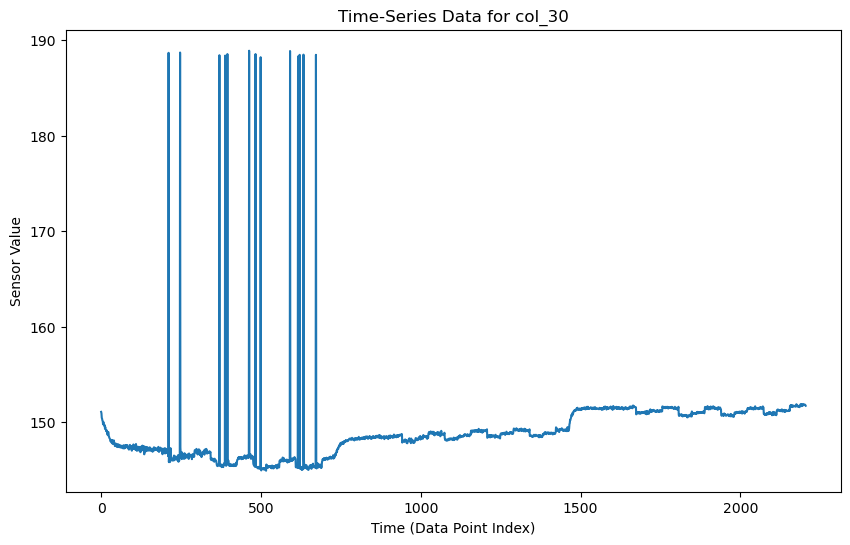

In [9]:
# Data Preparation
sensor_column = 'col_30'  
pressure_data_sorted = pressure_data.sort_index()

# Selecting the column for time-series forecasting
ts_data = pressure_data_sorted[sensor_column]

# Visualize the sensor data to understand its trend over time
plt.figure(figsize=(10, 6))
plt.plot(ts_data)
plt.title(f"Time-Series Data for {sensor_column}")
plt.xlabel('Time (Data Point Index)')
plt.ylabel('Sensor Value')
plt.savefig('Time_Series')
plt.show()


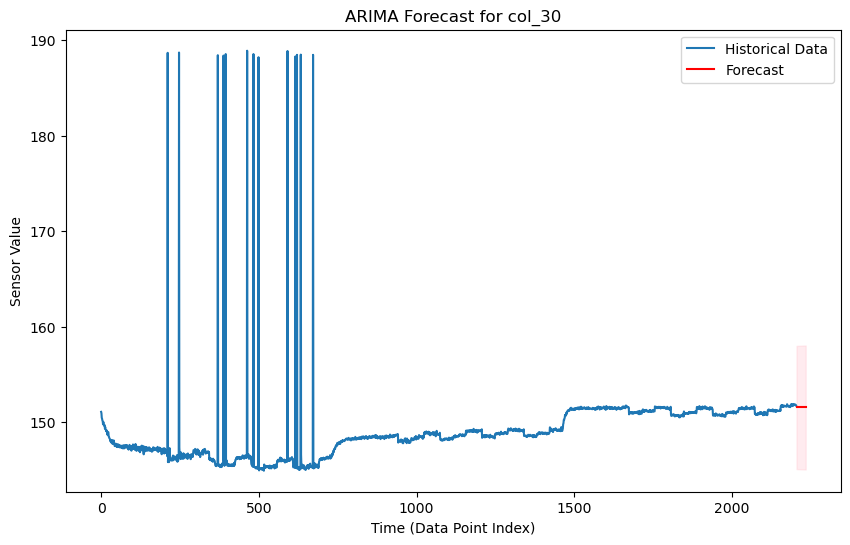

Mean Squared Error: 0.057014292166367296


In [10]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import numpy as np

# Auto ARIMA model to find optimal p, d, q parameters
arima_model = pm.auto_arima(ts_data, seasonal=False, stepwise=True, suppress_warnings=True)

# Fit the ARIMA model
arima_model.fit(ts_data)

# Forecasting the next 30 data points
n_periods = 30
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Creating index for future predictions
forecast_index = np.arange(len(ts_data), len(ts_data) + n_periods)

# Visualize the forecast and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Historical Data')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title(f"ARIMA Forecast for {sensor_column}")
plt.xlabel('Time (Data Point Index)')
plt.ylabel('Sensor Value')
plt.legend()
plt.savefig('Auto_Arima')
plt.show()

# Calculate the mean squared error for performance evaluation
predicted = forecast[:len(ts_data)]
mse = mean_squared_error(ts_data[-len(predicted):], predicted)
print(f'Mean Squared Error: {mse}')


C:\Users\Alexis\anaconda3\envs\py312_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


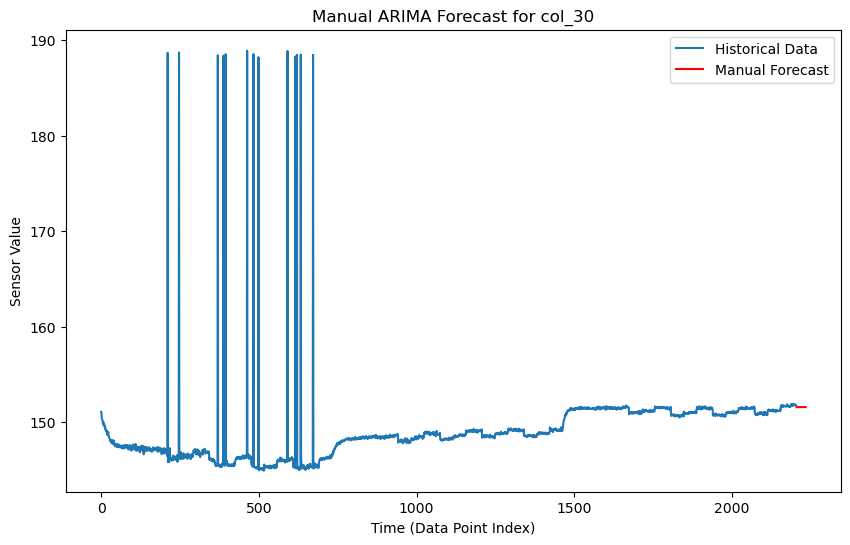

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Manually set ARIMA parameters (you can experiment with different values)
p = 5  # AutoRegressive part (how many past values to consider)
d = 1  # Differencing (to make the data stationary)
q = 2  # Moving Average part (how many past forecast errors to consider)

# Fit ARIMA with custom parameters
manual_arima_model = ARIMA(ts_data, order=(p, d, q)).fit()

# Forecasting the next 30 data points
forecast_manual = manual_arima_model.forecast(steps=n_periods)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label="Historical Data")
plt.plot(forecast_index, forecast_manual, color='red', label='Manual Forecast')
plt.title(f"Manual ARIMA Forecast for {sensor_column}")
plt.xlabel('Time (Data Point Index)')
plt.ylabel('Sensor Value')
plt.legend()
plt.savefig('Manual_Arima')
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ts_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')




ADF Statistic: -2.630488818295178
p-value: 0.08685813625931144


In [22]:
ts_data_diff = ts_data.diff().dropna()


## Anomaly Detection
Anomalies in the sensor data were detected using a forecasting model. We visualized these anomalies, which may indicate system failures or required maintenance. By identifying anomalies early, we can reduce the likelihood of costly system breakdowns.

C:\Users\Alexis\anaconda3\envs\py312_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Alexis\anaconda3\envs\py312_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


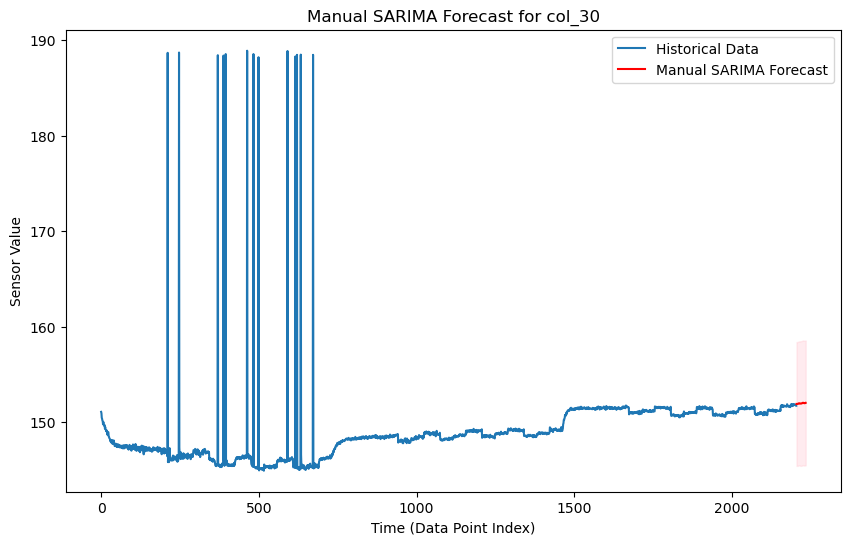

In [14]:
sarima_model_manual = pm.ARIMA(order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_model_manual.fit(ts_data)
forecast_manual, conf_int_manual = sarima_model_manual.predict(n_periods=n_periods, return_conf_int=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label="Historical Data")
plt.plot(forecast_index, forecast_manual, color='red', label='Manual SARIMA Forecast')
plt.fill_between(forecast_index, conf_int_manual[:, 0], conf_int_manual[:, 1], color='pink', alpha=0.3)
plt.title(f"Manual SARIMA Forecast for {sensor_column}")
plt.xlabel('Time (Data Point Index)')
plt.ylabel('Sensor Value')
plt.legend()
plt.savefig('Manual_Sarima')
plt.show()



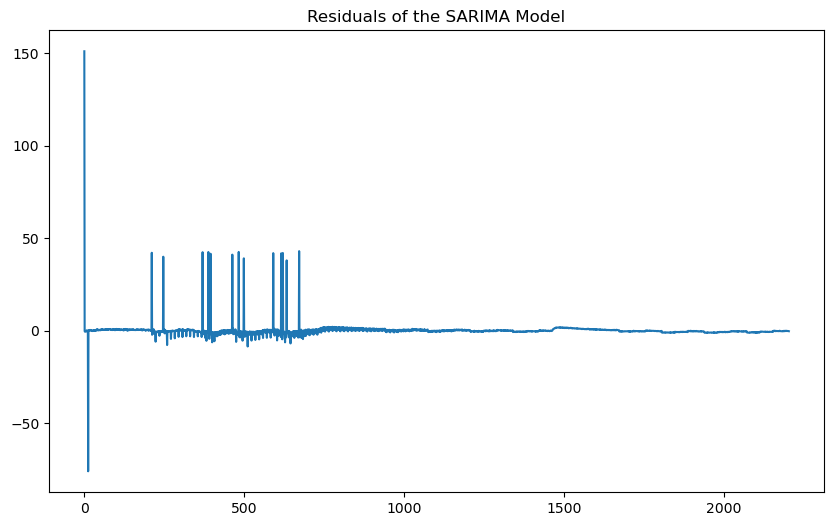

In [16]:
residuals = sarima_model_manual.resid()
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the SARIMA Model')
plt.savefig('Sarima_Residuals')
plt.show()


## Conclusions
The time-series forecasting models provided valuable insights into the future behavior of sensor values in the hydraulic system. Anomaly detection helped us identify potential system issues. This analysis can help optimize maintenance schedules and reduce downtime.